# Finch Carr - PHYS 434 Lab 03
## Asking a Statistical Question
- Consists of 3+ steps
  - 1. Writing down in words what you want to ask precisely
  - 2. Translating the question into mathematical expression, determining the PDF of the background, and the integrals to do to obtain a probability
  - 3. Converting the probability into an equivalent sigma
- We will assume that we know the form of the signal-free background distribution. In each of our three examples, your task will be to state the statistical question, convert it to math, then perform the associated analyses

## Problem 1
- looking at the temperature reading (meta-data) associated with an experiment, the temperature should be at around 12 Kelvin. The data we have is mostly consistent with 12 Kelvin within the 0.4 degree precision of the thermometry and the thermal control system (standard deviation). However, the thermal control system misbehaved and the temperature was sometimes not near 12 K, and in addition there are various glitches in the thermometry that give anomalously high and low readings (the reading does not match the real temperature).

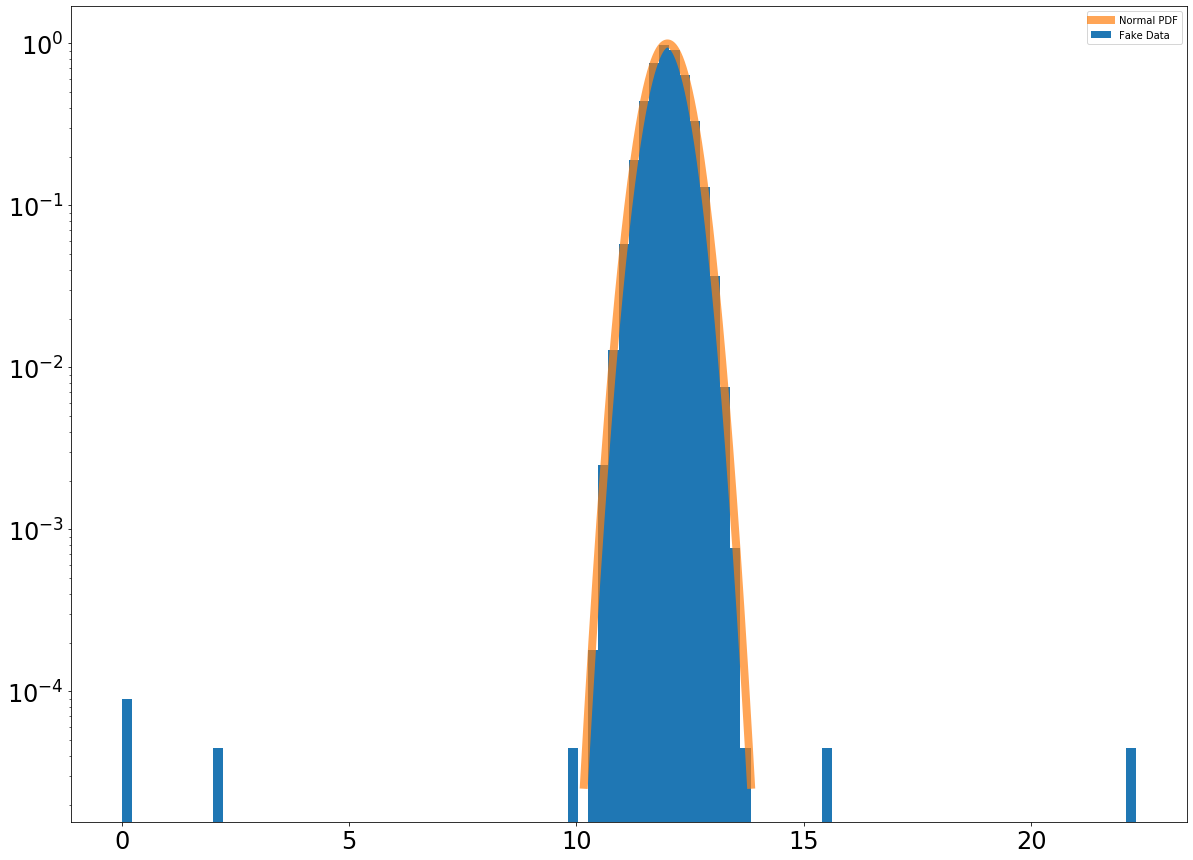

In [1]:
# Code given in Lab 03 Prompt
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), 
              [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])

fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True, label='Fake Data')
plt.tick_params(labelsize = 24)
plt.yscale('log')
x = np.linspace(stats.norm.ppf(0.001, 12, 0.4)-0.6, 
                stats.norm.ppf(.999, 12, 0.4)+0.6, 100008)
ax.plot(x,stats.norm.pdf(x,loc = 12., scale = 0.4), linewidth = 8, alpha = 0.7, label='Normal PDF')
ax.legend(loc='best')
# plt.xlim(9, 16, 0.5)
plt.show()

- Our statistical question is as follows:
  - We want to design a test for our fake data such that the accuracy of identification of 'bad data points' is within a certain measurement of error such that the same test can be applied to real temperature data with a high degree of accuracy. 
  - Our test will involve testing probability values output from the PDFs of the fake temperature data with specific known 'bad datapoints' as well as a Standardized Normal Distribution with the same mean and standard deviation as our fake data, and we will compare measurement values for certain datapoints of both good and bad categories. Good data points should fall between a range of 4 standard deviations to the right or left of the mean, while most bad data points will return fall outside of those standard deviations. We first want to identify data points that fall outside of our distribution by large margins.
- Our question expressed mathematically:

In [2]:
#    - BadData = HistogramPDF(0, loc=12, scale=0.4) - NormalPDF(0, loc=12, scale=0.4) > x
#    - GoodData = HistogramPDF(0, loc=12, scale=0.4) - NormalPDF(0, loc=12, scale=0.4) = approximately 0
#def DataFinder(x, mean, std)

#12 - 0.4 - 0.4 - 0.4 - 0.4 = 10.4
#12 + 0.4 + 0.4 + 0.4 + 0.4 = 13.6

In [3]:
minn = stats.norm.cdf(10.4, loc=12, scale=0.4)
maxx = 1-stats.norm.cdf(13.6, loc=12, scale=0.4)
minn, maxx

(3.167124183311998e-05, 3.167124183311998e-05)

In [4]:
BadData = 0;
for x in range(len(d)):
    datapoint = d[x];
    if (datapoint > 13.6 or datapoint < 10.4):
        BadData = BadData+1;
        print(datapoint)
GoodData = 0;
for x in range(len(d)):
    datapoint = d[x];
    if (10.4 <= datapoint <= 13.6):
        GoodData = GoodData+1
        
BadData + GoodData, BadData, GoodData

13.70279529930067
10.0
10.3
2.1
0.0
0.0
15.6
22.3


(100008, 8, 100000)

In [8]:
Truth = {'True T': [99999, 1],
        'Bad T': [1, 7]}
TruthFrame = pd.DataFrame(Truth, columns=['True T', 'Bad T'], 
                          index=['Our Test Good', 'Our Test Bad'])
TruthFrame

,True T,Bad T
Our Test Good,99999,1
Our Test Bad,1,7
